<h1>Problem Background and Motivation</h1>
<img src='https://www.frommers.com/system/media_items/attachments/000/864/746/s980/shutterstock_ribkhan-crop.jpg?1571248109'/>

# <br>Brief Description of the problem</br>


 # Problem statement

 
    

<h1>Here we are importing the packages for doing "MACHINE LEARNING" :) </h1>
    <body> To learn about what different python packages are used for visit</body>
    <a href="https://www.youtube.com/watch?v=-29x_deQQus">Top 40 Python Libraries EXPLAINED in 20 minutes</a>
    <br><a href="https://docs.python.org/3/tutorial/modules.html#">Python Documentation- Modules</a></br>
   

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn import metrics  

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv("hotel_bookings.csv")

In [40]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [42]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<h1> Preparing our data</h1><br>
<body>
<br>Data Preparation is the process of collecting, cleaning, and consolidating data into one file or data table, primarily for use in analysis.</br>
<h1>Important things to be done here!<br>
    <a href="https://medium.com/analytics-vidhya/data-preparation-in-data-science-16f9311760">Data Preparation</a></h1>
<br>*Missing Values -It is the most important part of the Exploratory data analysis phase which can can affect further statistical/Machine Learning modelling.</br>
<br> standardizing data formats</br>
<br>Enriching source data</br>
Fix the issue of Missing data

Missing values will be highlighted in yellow.

Resolve the missing values by:

    Fill missing values with default value/average value
    Drop column if it is not usable or if the number of missing values is very high



In [43]:
# Let's clean up our data!

# remove any dupes
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

#df.describe()
#df.dtypes
#df.info()
#df.isnull().sum()


Number of records: 119390
Number of records after dropping dupes: 119390


The function dataframe. isnull(). sum() returns the number of missing values in the data set.

In [44]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<AxesSubplot:>

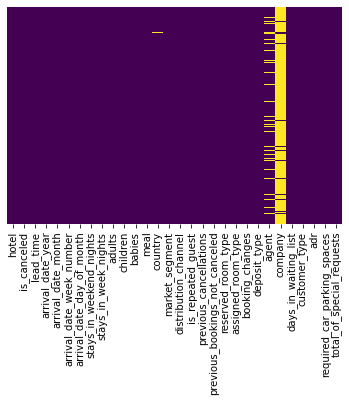

In [45]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
# Filling up the empty cells of country,agent,company.
df.fillna({'country':0},  inplace=True)
df.fillna({'agent':0},  inplace=True)
df.fillna({'company':0},  inplace=True)
df.fillna({'children':0},  inplace=True)


<AxesSubplot:>

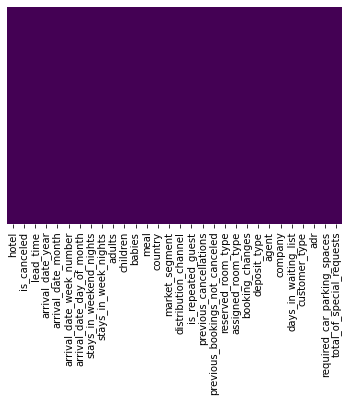

In [47]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')



In [48]:
# Prep to feature transformation of Make

# Keep top 5 Makes and label all the rest as "OTHER"
keep = df['country'].value_counts().index[:5]
df['country'] = np.where(df['country'].isin(keep), df['country'], 'OTHER')
# print(df)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
cat_vars = ['hotel','arrival_date_month','meal',
            'country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type']
# Loop over categorical vars and encode each one
for var in cat_vars:
    df[var] = df[var].astype("category")

df = pd.get_dummies(df,columns=cat_vars, prefix_sep='_', drop_first=True)

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,country_ESP,country_FRA,country_GBR,country_OTHER,country_PRT,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,0.335539,0.116233,0.056789,0.067577,0.049661,0.106047,0.091624,0.082034,0.098760,0.056906,0.093475,0.088014,0.006684,0.121141,0.089203,0.009791,0.071765,0.087235,0.101591,0.271388,0.406986,0.006223,0.044350,0.105587,0.165935,0.202856,0.473046,0.000017,0.122665,0.001617,0.819750,0.000042,0.009364,0.007806,0.160826,0.054737,0.024265,0.017539,0.005034,0.000050,0.000101,0.018117,0.019893,0.212095,0.065382,0.031418,0.021384,0.005964,0.003040,0.002337,0.000008,0.000101,0.122179,0.001357,0.004833,0.750591,0.210436
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,0.472181,0.320505,0.231439,0.251019,0.217244,0.307900,0.288496,0.274417,0.298341,0.231664,0.291098,0.283317,0.081482,0.326292,0.285038,0.098466,0.258099,0.282180,0.302112,0.444678,0.491274,0.078642,0.205873,0.307309,0.372024,0.402128,0.499275,0.004093,0.328054,0.040174,0.384397,0.006471,0.096315,0.088008,0.367372,0.227466,0.153871,0.131269,0.070772,0.007089,0.010025,0.133375,0.139632,0.408793,0.247200,0.174445,0.144660,0.076994,0.0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 77 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119390 non-null  float64
 9   babies                          119390 non-null  int64  
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

In [16]:
train_var = df.drop(['is_canceled'], axis=1)
test_var = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95512, 76), (95512,), (23878, 76), (23878,))

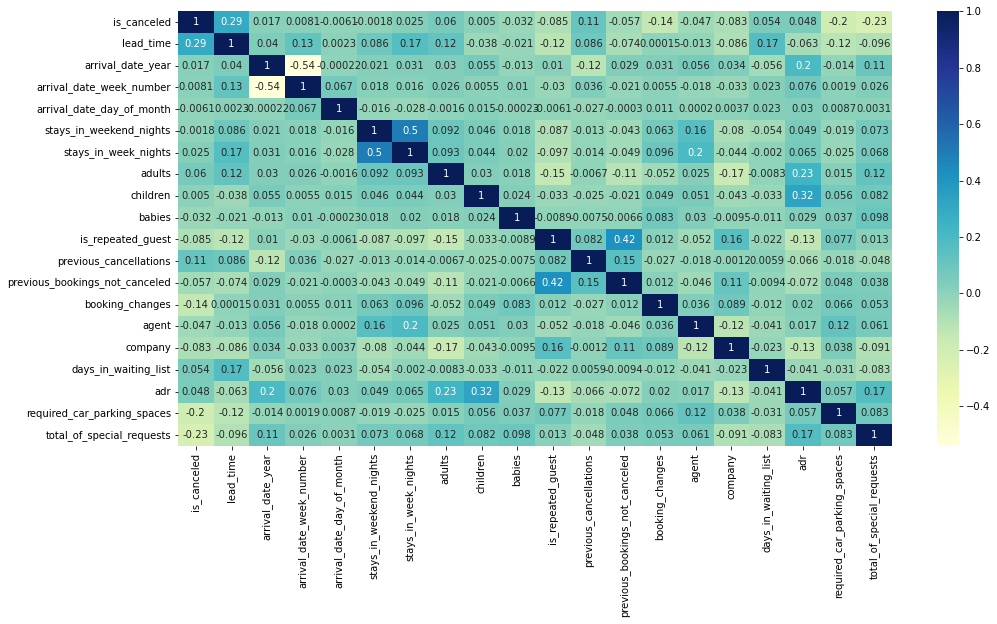

In [66]:
cars_n = df.select_dtypes(include=['float64', 'int'])
cars_n.head()
corr = cars_n.corr()
corr
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [17]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [18]:
df.isnull().sum()

is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_week_number         0
arrival_date_day_of_month        0
                                ..
deposit_type_Non Refund          0
deposit_type_Refundable          0
customer_type_Group              0
customer_type_Transient          0
customer_type_Transient-Party    0
Length: 77, dtype: int64

<AxesSubplot:>

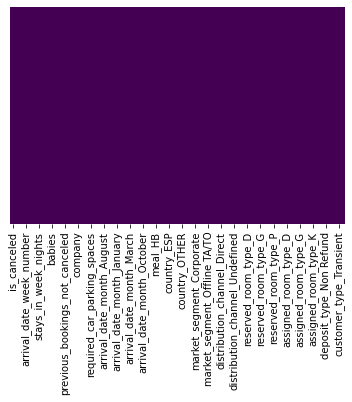

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
#Logistic Regression
from timeit import default_timer as timer
start = timer()

logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))

timer = timer()-start
print("Time taken:", timer)

Average cross validation score: 0.808
Test accuracy: 0.804
F1 score: 0.706
[[13589  1372]
 [ 3298  5619]]
Time taken: 16.381605900000068


Time taken: 805.8985473000002


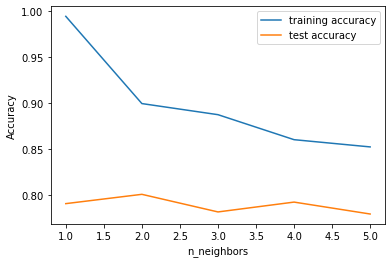

In [57]:
#KNN
from timeit import default_timer as timer
start = timer()

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 6)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

timer = timer()-start
print("Time taken:", timer)


In [59]:
from timeit import default_timer as timer
start = timer()
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
scores = cross_val_score(knn, X_train, y_train, cv=5)
knn_pred = knn.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
print(confusion_matrix(y_test, knn_pred))
timer = timer()-start
print("Time taken:", timer)


Average cross validation score: 0.779
Test accuracy: 0.781
F1 score: 0.700
[[12561  2400]
 [ 2818  6099]]
Time taken: 155.41073010000036


C:\Users\SHREYASH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\SHREYASH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


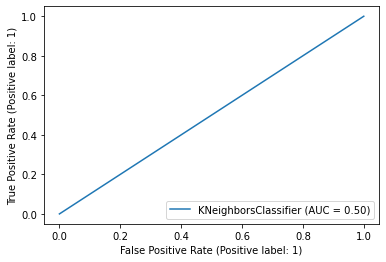

C:\Users\SHREYASH\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


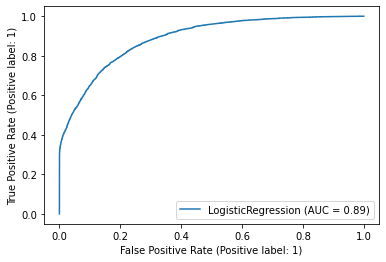

In [58]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test_mm,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(logreg,X_test_mm,y_test)
plt.show()

In [63]:
#Decision Tree
from timeit import default_timer as timer
start = timer()

tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))
timer = timer()-start
print("Time taken:", timer)


Average cross validation score: 0.751
Test accuracy: 0.746
F1 score: 0.485
[[14939    22]
 [ 6053  2864]]
Time taken: 0.6562993999996252


In [62]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [64]:
#Random Forest

from timeit import default_timer as timer
start = timer()

param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)
timer = timer()-start
print("Time taken:", timer)


Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.7792109483817983
Test score: 0.763
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.78392245690039
Test score: 0.773
Time taken: 124.41411030000017


In [65]:
#Multi Layer Perceptron
from timeit import default_timer as timer
start = timer()

mlp = MLPClassifier(hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))
timer = timer()-start
print("Time taken:", timer)


Train score: 0.887
Test accuracy: 0.865
F1 score: 0.811
[[13727  1234]
 [ 1999  6918]]
Time taken: 54.272274100000686


| Model | Test Accuracy | F1 score| TP | FN | FP | TN | Time taken |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Logistic Regression | 5619 | 0.706 | 13589 | 1372 | 3298 | 5619 | 16.381605900000068 |
| Multilayer Perceptron | 0.868 | 0.818 | 13648 | 1313 | 1844 | 7073 | 54.272274100000686 |
||

# <br>LOGISTIC REGRESSION</br>
<br>Test accuracy: 0.804</br>
<br>F1 score: 0.706</br>
<br>[[TP=13589  FN=1372]
 [FP=3298   TN=5619]]</br>
<br>Time taken  16.381605900000068</br>
<br>








</br>


# <br>MULTILAYER PERCEPTROM</br>
<br>Train score: 0.889</br>
<br>Test accuracy: 0.868</br>
<br>F1 score: 0.818</br>
<br>[[TP=13648  FN=1313]
 [FP=1844  TN=7073]]</br>
<br>Time taken 54.272274100000686</br>
<br>








</br>

# <br>RANDOM FOREST</br>
<br>Before feature selection:</br>
<br>Best parameters: {'max_depth': 5, 'n_estimators': 100}</br>
<br>Best score: 0.7766145189379522</br>
<br> score: 0.767</br>
<br>After feature selection</br>
<br>Best parameters: {'max_depth': 5, 'n_estimators': 75}</br>
<br>Best score: 0.7766982047127564</br>
<br>Test score: 0.764</br>
<br>








</br>
    
# <br>DECISION TREES</br>
<br>Average cross validation score: 0.751</br>
<br>Test accuracy: 0.746</br>
<br>F1 score: 0.485</br>
<br>[[TP=14939    FN=22]
 [ FP=6053  TN=2864]]</br>
<br>Time taken: 0.6562993999996252 </br>

<br>








</br>

# <br>KNN</br>    
<br>Average cross validation score: 0.779</br>
<br>Test accuracy: 0.781</br>
<br>F1 score: 0.700</br>
<br>[[12561  2400]
 [ 2818  6099]]</br>
<br> Time taken: 805.8985473000002</br>
                    +
<br>Time taken: 155.41073010000036</br> 
<br>








</br>    
True Positives- In this case, the people will cancel the bookings and our model is predicting the same.

True negatives- In this case, the people will not cancel the bookings and our model is predicting the same.

False positives- The people are not going to cancel but our model is predicting that they are going to.

False positives can lead to situations like people not cancelling but our model predicting they are. 
False Negatives- They people are  going to cancel but our model is predicting that they are not going to.

After comparing all the models looking at their accuracy test scores,the values of false negatives,the time it takes for the model to run. I have decided to select Multilayer perceptron(Artificial neural network) as my winning model. 


